<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [45]:
df = pd.read_csv('states_edu.csv')

Chosen test: Math for 8 grade

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [46]:
# Rename columns to make them more intuitive
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [47]:
# drop all the rows with missing values in 'AVG_MATH_8_SCORE'
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.describe()

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,602.000000,3.970000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,3.970000e+02,...,528.000000,528.000000,528.000000,3.970000e+02,4.480000e+02,5.280000e+02,564.000000,602.000000,521.000000,478.000000
mean,2007.490033,9.439262e+05,1.023135e+07,9.121775e+05,4.724386e+06,4.594788e+06,1.034093e+07,5.352896e+06,3.020171e+06,4.880250e+05,...,72539.367424,72077.121212,63550.556818,5.817467e+05,2.881217e+05,9.627404e+05,236.336879,278.280731,219.796545,263.870293
std,8.491205,1.115375e+06,1.286685e+07,1.298211e+06,6.050895e+06,5.993186e+06,1.311452e+07,6.887246e+06,3.660872e+06,5.875366e+05,...,84642.611500,83403.141836,74845.757387,6.861806e+05,3.412013e+05,1.122318e+06,9.291031,10.343482,6.962321,6.513002
min,1990.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.310700e+04,...,4643.000000,3371.000000,2785.000000,3.769800e+04,1.378100e+04,6.892500e+04,192.000000,231.000000,188.000000,238.000000
25%,2003.000000,2.741310e+05,2.600477e+06,2.356470e+05,1.340360e+06,8.724675e+05,2.519543e+06,1.355797e+06,7.694675e+05,1.289410e+05,...,20509.250000,20752.000000,18481.500000,1.656130e+05,8.141525e+04,2.809350e+05,232.000000,272.000000,216.000000,260.000000
50%,2009.000000,6.627740e+05,5.732319e+06,5.290370e+05,2.908595e+06,2.334041e+06,5.796945e+06,2.982862e+06,1.731328e+06,3.382670e+05,...,50972.500000,49819.000000,40864.500000,4.050170e+05,1.876495e+05,6.774000e+05,238.000000,280.500000,221.000000,265.000000
75%,2015.000000,1.026121e+06,1.166963e+07,1.009335e+06,5.886130e+06,5.230560e+06,1.141156e+07,5.995174e+06,3.484399e+06,5.669330e+05,...,82444.500000,81453.500000,75882.750000,6.458510e+05,3.293510e+05,1.086911e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000


In [48]:
# there are rows with enrollment estimates
df[df.ENROLL_ALL_EST.isna()].ENROLL_ALL.notna().sum()

131

In [49]:
# see if we can fill these in
((df.ENROLL_ALL - df.ENROLL_ALL_EST)/df.ENROLL_ALL).describe()

count    397.000000
mean       0.025946
std        0.051301
min       -0.096404
25%        0.003988
50%        0.013523
75%        0.031392
max        0.450693
dtype: float64

In [50]:
# not bad average error about 3%
df.ENROLL_ALL_EST = df.ENROLL_ALL_EST.fillna(df.ENROLL_ALL)

In [51]:
df.describe()

,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,602.000000,5.280000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,3.970000e+02,...,528.000000,528.000000,528.000000,3.970000e+02,4.480000e+02,5.280000e+02,564.000000,602.000000,521.000000,478.000000
mean,2007.490033,9.449153e+05,1.023135e+07,9.121775e+05,4.724386e+06,4.594788e+06,1.034093e+07,5.352896e+06,3.020171e+06,4.880250e+05,...,72539.367424,72077.121212,63550.556818,5.817467e+05,2.881217e+05,9.627404e+05,236.336879,278.280731,219.796545,263.870293
std,8.491205,1.101930e+06,1.286685e+07,1.298211e+06,6.050895e+06,5.993186e+06,1.311452e+07,6.887246e+06,3.660872e+06,5.875366e+05,...,84642.611500,83403.141836,74845.757387,6.861806e+05,3.412013e+05,1.122318e+06,9.291031,10.343482,6.962321,6.513002
min,1990.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.310700e+04,...,4643.000000,3371.000000,2785.000000,3.769800e+04,1.378100e+04,6.892500e+04,192.000000,231.000000,188.000000,238.000000
25%,2003.000000,2.781248e+05,2.600477e+06,2.356470e+05,1.340360e+06,8.724675e+05,2.519543e+06,1.355797e+06,7.694675e+05,1.289410e+05,...,20509.250000,20752.000000,18481.500000,1.656130e+05,8.141525e+04,2.809350e+05,232.000000,272.000000,216.000000,260.000000
50%,2009.000000,6.659445e+05,5.732319e+06,5.290370e+05,2.908595e+06,2.334041e+06,5.796945e+06,2.982862e+06,1.731328e+06,3.382670e+05,...,50972.500000,49819.000000,40864.500000,4.050170e+05,1.876495e+05,6.774000e+05,238.000000,280.500000,221.000000,265.000000
75%,2015.000000,1.037675e+06,1.166963e+07,1.009335e+06,5.886130e+06,5.230560e+06,1.141156e+07,5.995174e+06,3.484399e+06,5.669330e+05,...,82444.500000,81453.500000,75882.750000,6.458510e+05,3.293510e+05,1.086911e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [52]:
# create a new variable which represents expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']

In [53]:
df.corr()["AVG_MATH_8_SCORE"]

YEAR                                        0.552717
ENROLL_ALL_EST                             -0.040856
TOTAL_REVENUE                               0.095045
FEDERAL_REVENUE                             0.023831
STATE_REVENUE                               0.052929
LOCAL_REVENUE                               0.145453
TOTAL_EXPENDITURE                           0.091851
INSTRUCTION_EXPENDITURE                     0.097090
SUPPORT_SERVICES_EXPENDITURE                0.099414
OTHER_EXPENDITURE                          -0.010455
CAPITAL_OUTLAY_EXPENDITURE                  0.027447
ENROLL_PREK                                 0.100716
ENROLL_KINDER                              -0.054616
ENROLL_4                                   -0.050787
ENROLL_8                                   -0.032233
ENROLL_12                                   0.020345
ENROLL_PRIMARY                             -0.052410
ENROLL_HS                                  -0.028654
ENROLL_ALL                                 -0.

Final feature list: **['YEAR', 'TOTAL_REVENUE', 
       'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
        'ENROLL_PREK', 'ENROLL_KINDER',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT']**

Feature selection justification: **I choose some related features and also some features of higher correlation coeff with AVG_MATH_8_SCORE**

<h2> EDA </h2>

Visualization 1

<AxesSubplot:>

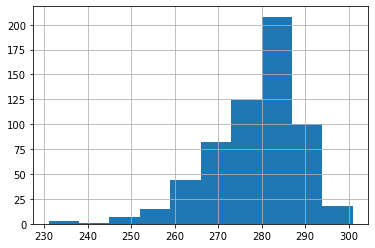

In [72]:
df.AVG_MATH_8_SCORE.hist()

**Histogram for 8th math grades**

Visualization 2

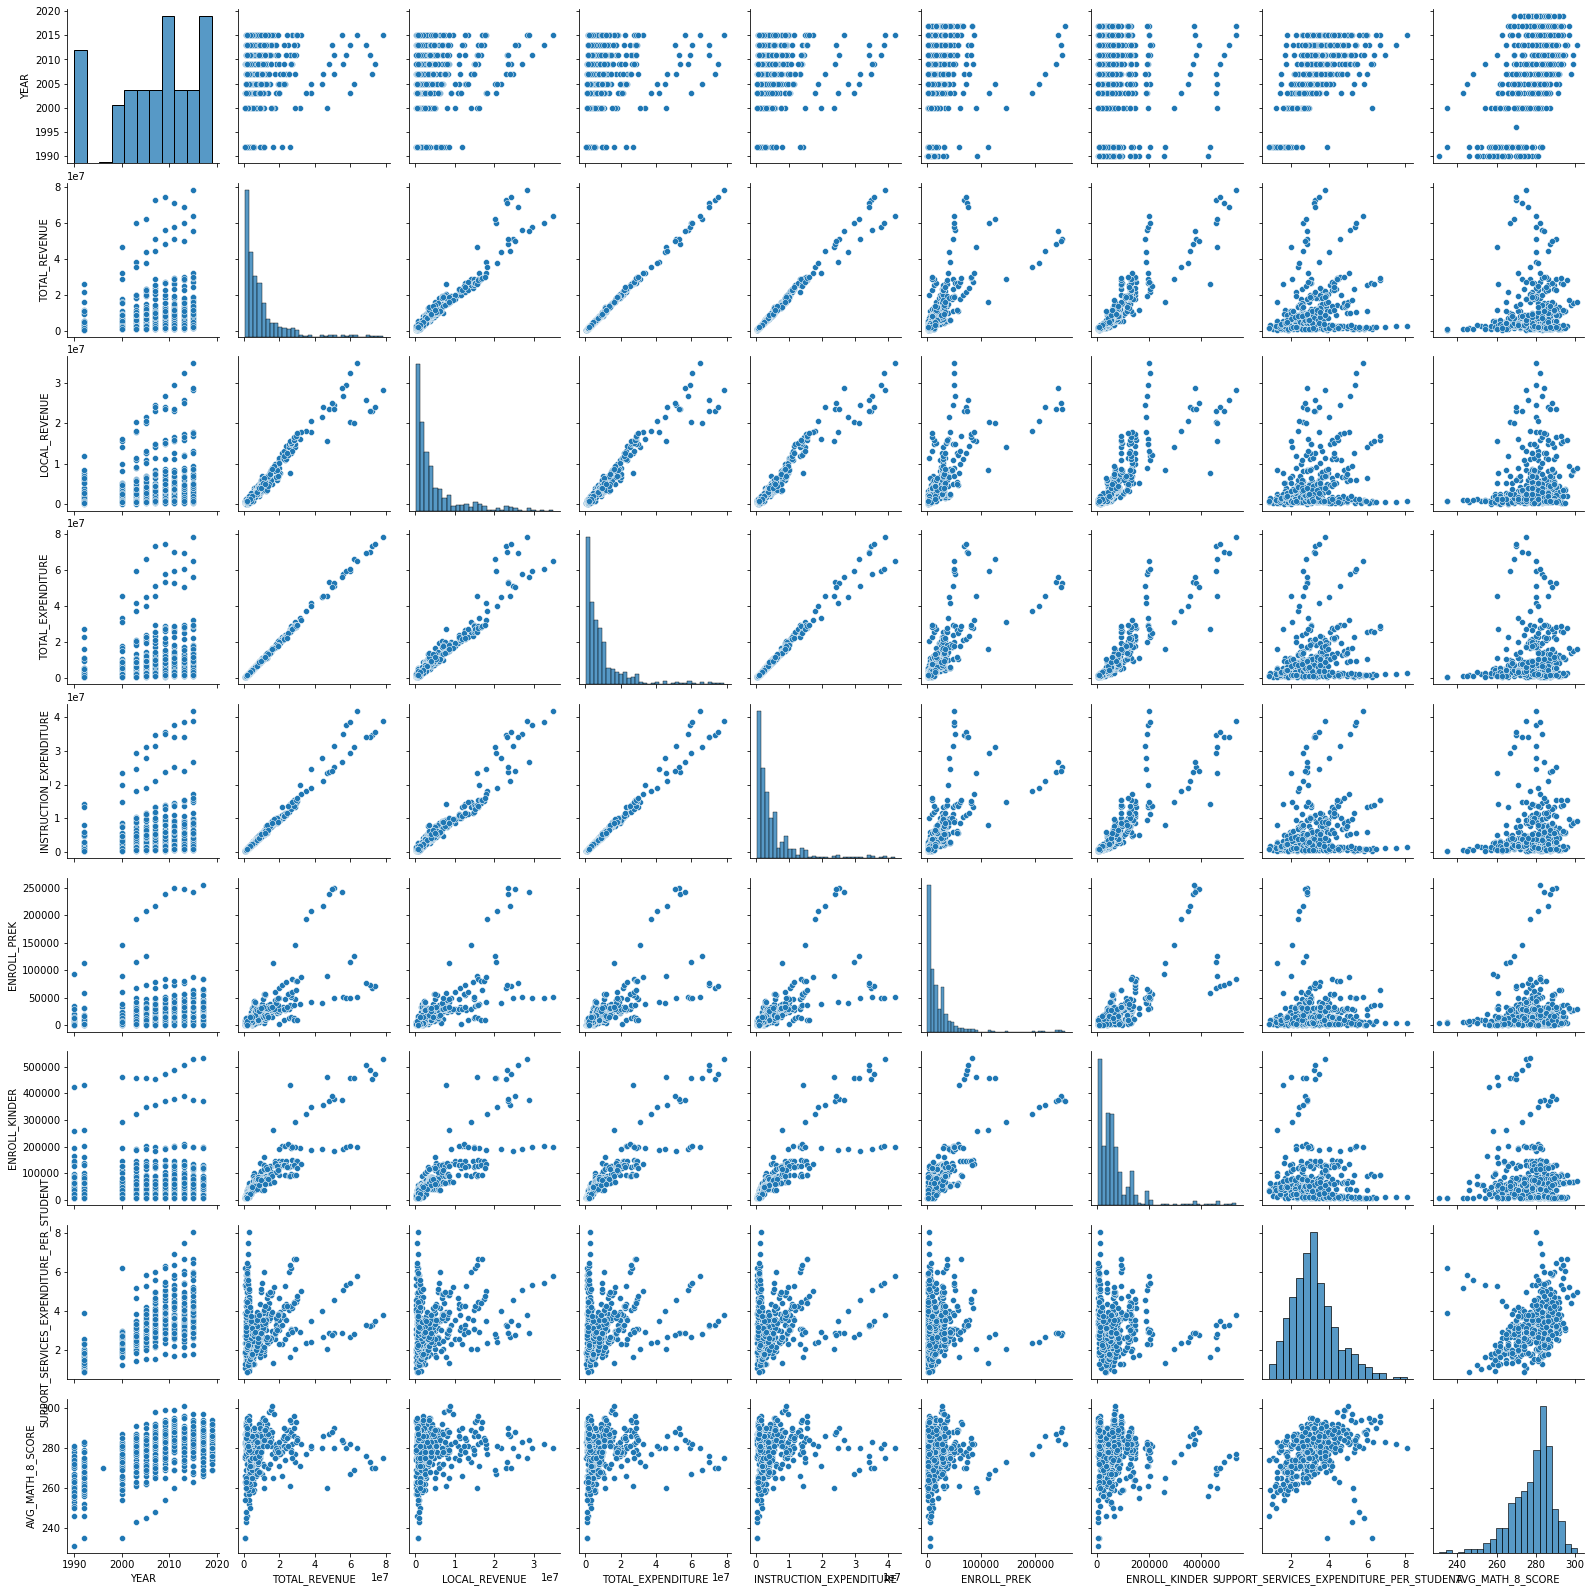

In [73]:
df_selected = df[['YEAR', 'TOTAL_REVENUE', 
       'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
        'ENROLL_PREK', 'ENROLL_KINDER',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT','AVG_MATH_8_SCORE']]
sns.pairplot(df_selected)

**Selected Feature Pair plot**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [74]:
from sklearn.model_selection import train_test_split

In [80]:
X = df_selected.drop(columns=['AVG_MATH_8_SCORE']).dropna()
y = df_selected.loc[X.index]['AVG_MATH_8_SCORE']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **REGRESSION**

In [82]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [83]:
# create your model here
model = LinearRegression()

In [84]:
model.fit(X_train, y_train)

LinearRegression()

In [91]:
print(model.intercept_)
print(X.columns)
print(model.coef_)

-1029.4534247325528
Index(['YEAR', 'TOTAL_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'],
      dtype='object')
[ 6.53271270e-01  1.83901130e-07  1.36754216e-06  4.13769575e-07
 -1.37419591e-06 -4.91820105e-06 -7.07569227e-05 -8.02322299e-01]


In [85]:
y_pred = model.predict(X_test)

Text(0, 0.5, '8th Grade Math Score')

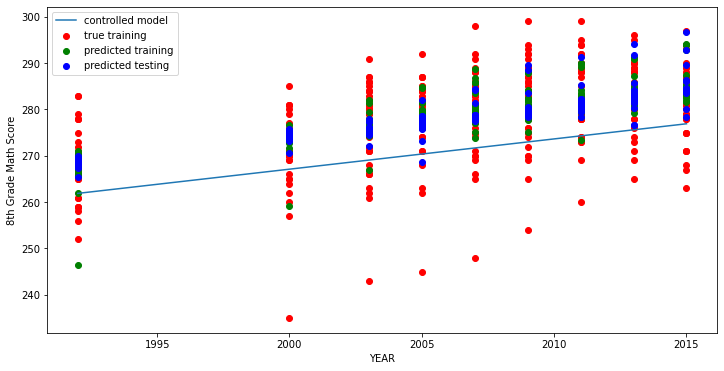

In [89]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "YEAR"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("8th Grade Math Score")

<h2> Summary </h2>

**For this practice I choose to build a simple linear regression model to predict the average math score for 8th grade students in the US. I cleaned the data and picked some features that were sensical or correlated with y to some degree. Then I did some exploratory plotting and fitted the linear model. From the linear model's coefficients, it seems the largest weight was from 'YEAR', which is not a big surprise. Can't wait to start the real projects! :)**